Import required libraries

In [5]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import matplotlib as mt
import seaborn as sns
from sklearn import linear_model
from scipy.stats import skew,kurtosis
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sb

In [6]:
import warnings
warnings.filterwarnings('ignore')

Read data from csv to dataframe

In [7]:
df = pd.read_csv("C:/Users/M1078280/OneDrive - Mindtree Limited/Desktop/Mine Learn/#Project/Diabetes prediction/archive/diabetes.csv")

View and Analyse data

In [8]:
# size give total number of observations:=) 
# size = no. of rows * no. of columns of df.shape
df.size

6912

In [9]:
# number of total observations and columns
df.shape

(768, 9)

In [10]:
# prints first five observations
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# prints last five observations
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# number of null or na values in data frame
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# statistics of data frame
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# complete profile report of dataframe
# pp.ProfileReport(df)

In [16]:
# checking nulls and zeros in dataframe
# nulls in all features
print(df.isna().sum())

# check zeros
print("\n"+"Zeros"+"\n\n",(df==0).sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zeros

 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [17]:
#Checking on negative values
(df<0).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
#to find duplicates in dataframe
df.duplicated().sum()

0

Analysing data using Visualizations

Skewness:  [ 0.90167398  0.1737535  -1.84360798  0.1093725   2.27225086 -0.42898159
  1.91991107  1.1295967   0.63501664]
kurtosis:  [ 0.15921978  0.64077982  5.18015656 -0.52007187  7.21425955  3.2904429
  5.59495353  0.64315889 -1.60092976]


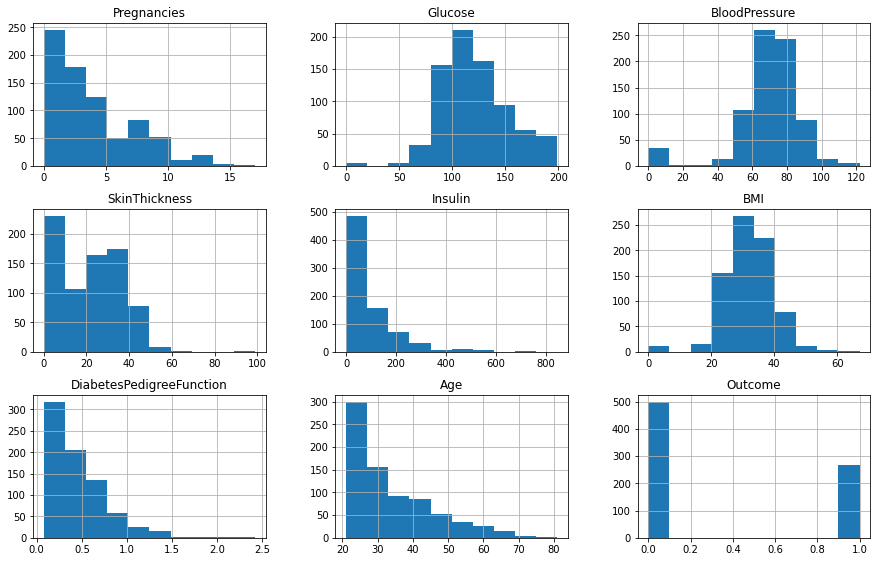

In [19]:
# skewness and kurtosis

print("Skewness: ",skew(df,bias=False))
print("kurtosis: ",kurtosis(df, bias=False))

#bias=False since calculating sample skewness 

#sb.kdeplot(df["Pregnancies"],fill=True)
df.hist(figsize=(15,30),layout=(9,3))
plt.show()

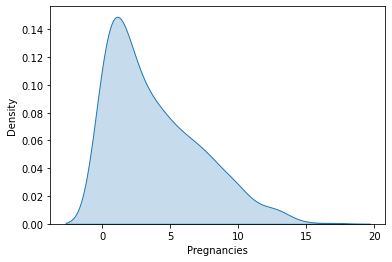

In [20]:
# Outliers
sb.kdeplot(df["Pregnancies"],fill=True) # Kernal density estimation

plt.show()

In [21]:
df["Pregnancies"].max()

17

{'whiskers': [<matplotlib.lines.Line2D at 0x2e8321d5320>,
 'caps': [<matplotlib.lines.Line2D at 0x2e8321d58d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e8321d50f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e8321d5e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e8321b7dd8>],
 'means': []}

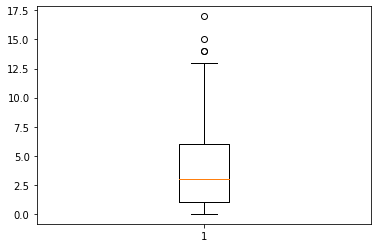

In [22]:
plt.boxplot(df["Pregnancies"])

In [23]:
# outlier detection using IQR score

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

IQR1 = Q1-1.5*IQR
IQR3 = Q3+1.5*IQR

outlier = []
count=0
totaloutliers=0
for i in df.columns:
    count1=count+1
    if count1>count:
        print(i,"\t",IQR1[i],"\t",IQR3[i])
    for j in df[i]:
        if (j>IQR3[i])|(j<IQR1[i]):
            totaloutliers=totaloutliers+1
            
print("\n*Total number of outliers: ",totaloutliers)

# after detecting the outliers, either outliers can be removed or imputed with the mean
# or outliers can also be handled using robust statistics: 
#univariate method
#multivariate method
#minkowski error


Pregnancies 	 -6.5 	 13.5
Glucose 	 37.125 	 202.125
BloodPressure 	 35.0 	 107.0
SkinThickness 	 -48.0 	 80.0
Insulin 	 -190.875 	 318.125
BMI 	 13.35 	 50.550000000000004
DiabetesPedigreeFunction 	 -0.32999999999999996 	 1.2
Age 	 -1.5 	 66.5
Outcome 	 -1.5 	 2.5

*Total number of outliers:  146


In [24]:
# Handling outliers by imputing with mean (same process can be used for capping-upper,lower limits using mean,std)

# As the IQR1, IQR3 values will be in decimal format take max,min of non-outlier values to use for range in imputation
df_copy = df.copy()
def impute_outlier_mean(df_copy,col):
    upper = df_copy[~(df_copy>(IQR3[col]))].max()
    lower = df_copy[~(df_copy<(IQR1[col]))].min()

    df_copy=np.where(df_copy>upper,df_copy.mean(),np.where(df_copy<lower,df_copy.mean(),df_copy))
    return df_copy

In [25]:
# Handling outliers by calling above function
# Imputed mean in outliers
for column in df_copy.columns:
    df_copy[column]=impute_outlier_mean(df_copy[column],column)

In [26]:
# Print columns of dataframe
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
# Verifying if the outliers are imputed with mean
# verify 1
print((df_copy["Pregnancies"]>IQR3["Pregnancies"]).sum())
print((df_copy["Age"]>IQR3["Age"]).sum())

0
0


In [28]:
# Outliers before imputation
# verify 2
print((df["Pregnancies"]>IQR3["Pregnancies"]).sum())
print((df["Age"]>IQR3["Age"]).sum())

4
9


In [29]:
# In "df_copy" dataframe all outliers in columns are imputed with means of every column 
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0


In [30]:
df_outlr = df_copy.copy()

In [31]:
# Count of each unique value in a column
df_outlr["Outcome"].value_counts()


0.0    500
1.0    268
Name: Outcome, dtype: int64

In [32]:
# Take dependent and independent variables into X and Y
X = df_outlr.drop("Outcome",axis=1)
Y = df_outlr["Outcome"]
X.shape, Y.shape

((768, 8), (768,))

**Sampling**

* From the above result it is clear that the dataset is an imbalanced
* NEED to handle the imbalance in dataset

* To handle an imbalanced dataset we need to do sampling using existing dataset observations
* We can do two types of sampling: 1. Under Sampling or Down Sampling 2. Over Sampling or UpSampling

* We can go for UnderSampling only when the dataset is very large like when it has million observations
* As the Diabetes dataset we are working with has very less observations we are going for OverSampling

* For OverSampling we can use three different libraries
* 1.RandomOverSampler 2.SMOTETomek 3.SMOTEEENN
* In this use case I am gonna use SMOTETomek which is combination of both under sampling and oversampling

In [33]:
# Using SMOTETomek(combination of over and under sampling read doc)
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_res,y_res=smk.fit_resample(X,Y)
X_res.shape,y_res.shape

((938, 8), (938,))

In [34]:
print("Original dataset shape",X.shape,Y.shape)
print("Sampled dataset shape",X_res.shape,y_res.shape)

Original dataset shape (768, 8) (768,)
Sampled dataset shape (938, 8) (938,)


In [35]:
type(X_res)
type(y_res)

pandas.core.series.Series

In [36]:
df_sampled = pd.concat([X_res,y_res],axis=1)

In [37]:
print(df_sampled.shape)
df_sampled.head()

(938, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0


In [38]:
df_sampled["Outcome"].value_counts()

0.0    469
1.0    469
Name: Outcome, dtype: int64

**EDA**

In [39]:
# Correlation
# default correlation method: Pearson

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [40]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

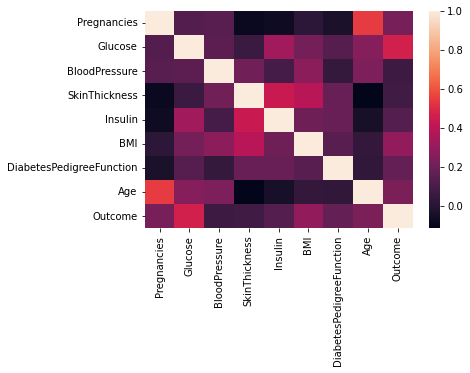

In [41]:
# correlation with seaborn heat map (ranges from -1 to +1)
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Correlation Heatmap')

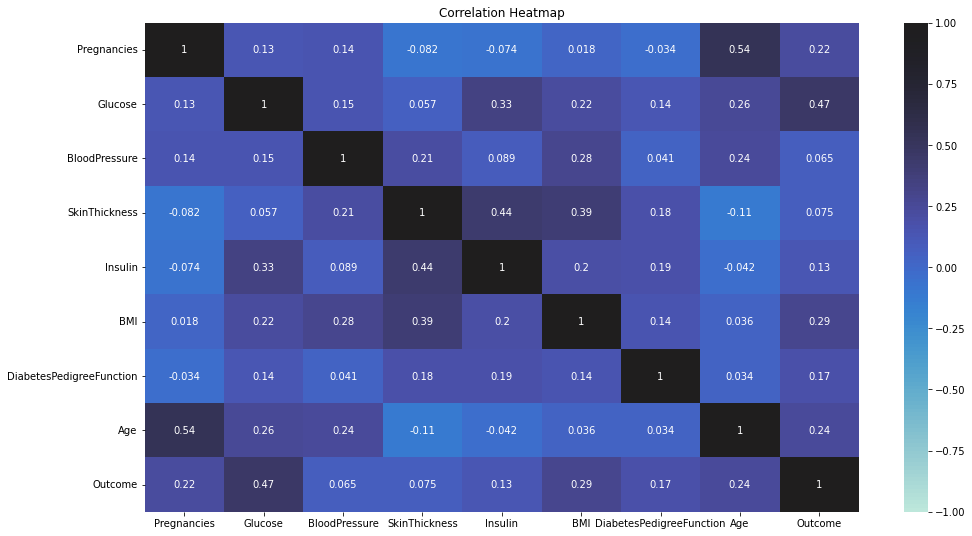

In [42]:
# increase figure size
plt.figure(figsize=(16,9))
# annot=True shows numbers on plot
# vmin, vmax to show scale from -1 to 1
# center True to show map in center colors i.e., blue color
heatmap = sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,center=True)    
heatmap.set_title("Correlation Heatmap")

* From above correlation heat map we can see that target variable "outcome" is positively correlated with Glucose,Age,Pregnancies,Diabetes pedigree function,Insulin 
* From above analysis the Independent variables are linearly correlated with Target variable

In [43]:
# Summary of above correlation matrix
corr_values = df.corr()
# unstack(to convert to series) to sort_values
unstack_values = corr_values.unstack()
# sort and find unique values
sorted_values = unstack_values.sort_values(kind="quicksort").unique()
sorted_values

array([-0.11397026, -0.08167177, -0.07353461, -0.04216295, -0.03352267,
        0.01768309,  0.03356131,  0.03624187,  0.04126495,  0.05732789,
        0.06506836,  0.07475223,  0.08893338,  0.12945867,  0.13054795,
        0.1373373 ,  0.14064695,  0.14128198,  0.15258959,  0.17384407,
        0.18392757,  0.18507093,  0.19785906,  0.20737054,  0.22107107,
        0.22189815,  0.23835598,  0.23952795,  0.26351432,  0.28180529,
        0.29269466,  0.33135711,  0.3925732 ,  0.43678257,  0.4665814 ,
        0.54434123,  1.        ])

* From above sorting and correlation heatmap we can say
* Highest 0.54- Age & Pregnancies, 0.47- Outcome & Glucose, 0.44- Insulin & Skinthickness
* There is 0.54 correlation between Age and Pregnancies, Age is directly proportional to Pregnancies.
* There is a correlation of 0.47 between Outcome & Glucose. As glucose level increases the result of having diabetes increases.
* There is a correlation of 0.44 Insulin & Skinthickness. As skin thickness increases the Insulin level also increases

In [44]:
# Covariance  (ranges from -inf to +inf)
df.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


<AxesSubplot:>

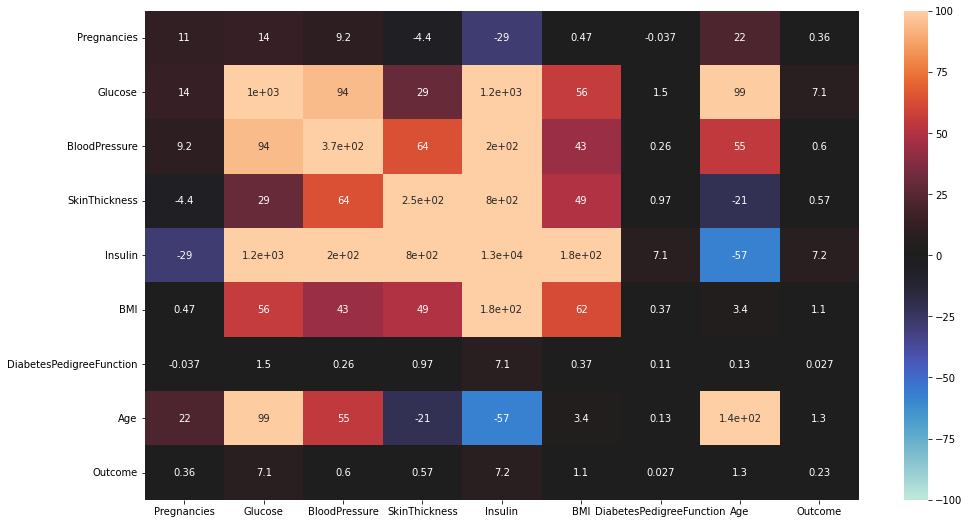

In [45]:
# Covariance heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.cov(),vmin=-100,vmax=100,annot=True,center=True)

* From the above correlation and covariance matrix :
*> As the Glucose level increases the Outcome tends to be positive for diabetes. (0.53)
*> There is 0.54 correlation between Age and Pregnancies, Age is directly proportional to number of Pregnancies.
*> As skin thickness increases the insulin level also increases(0.52)

Plotting correlations using Matplotlib and Seaborn libraries

Text(0, 0.5, 'Glucose Level')

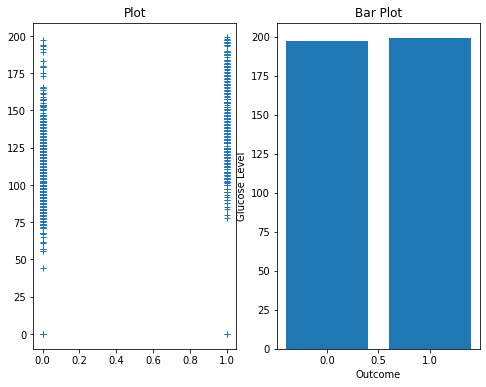

In [46]:
# Glucose level, Outcome

fig, axis = plt.subplots(1,2)

# plot 
fig.set_figwidth(8)
fig.set_figheight(6)
axis[0].plot(df["Outcome"],df["Glucose"],"+")
axis[0].set_title("Plot")

# bar graph
axis[1].bar(df["Outcome"],df["Glucose"])
axis[1].set_title("Bar Plot")

plt.xlabel("Outcome")
plt.ylabel("Glucose Level",loc='center')

Text(0, 0.5, 'Pregnancies')

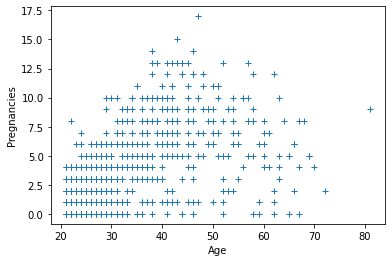

In [47]:
# Age, Pegnancies
plt.plot(df["Age"],df["Pregnancies"],"+")
plt.xlabel("Age")
plt.ylabel("Pregnancies")

Text(0.5, 1.0, 'Pregnancies')

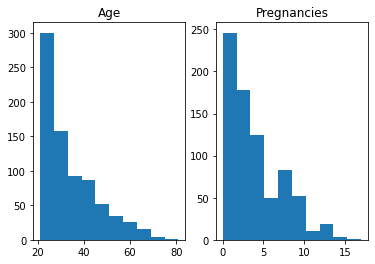

In [48]:
# Age, Pregnancies histogram
fig,axis = plt.subplots(1,2)

axis[0].hist(df["Age"])
axis[0].set_title('Age')

axis[1].hist(df["Pregnancies"])
axis[1].set_title('Pregnancies')

Text(0, 0.5, 'Insulin')

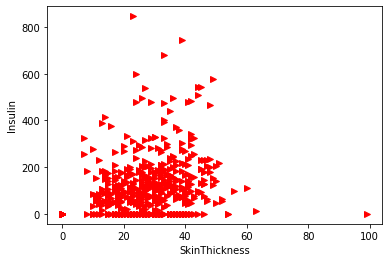

In [49]:
# Skin Thickness, Insulin
plt.plot(df["SkinThickness"],df["Insulin"],"r>")
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")

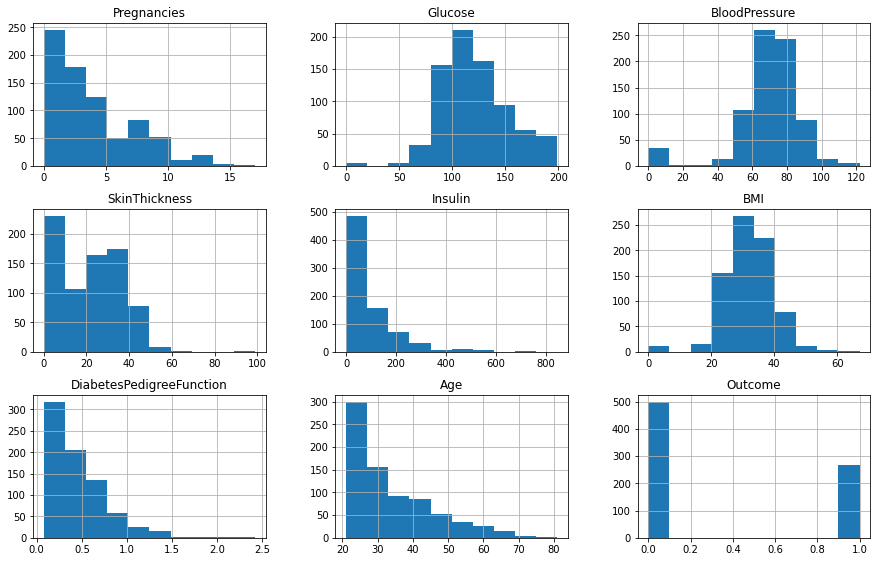

In [50]:
# Visualizations of all variables in DataFrame

df.hist(figsize=(15,30),layout=(9,3))
plt.show()

* From the Target variable "Outcome" visualization we can see the more number of observations are non-Diabetic.

In [51]:
# Desciptive statistics of data before performing data preprocessing
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
# Descriptive statistics of data after Data Preprocessing
df_sampled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,3.945480,126.240102,72.694538,21.258194,68.874981,32.804445,0.447409,33.600307,0.500000
std,3.222266,31.636979,10.901125,15.966362,81.673672,6.256410,0.235668,10.735446,0.500267
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,102.000000,66.000000,0.000000,0.000000,28.505893,0.258000,25.000000,0.000000
50%,3.000000,121.000000,72.000000,24.000000,42.500000,32.521091,0.410000,31.000000,0.500000
75%,6.000000,147.859248,80.000000,33.630082,126.000000,36.800000,0.590413,40.891744,1.000000
max,13.000000,199.000000,106.000000,63.000000,318.000000,50.000000,1.189000,66.000000,1.000000


* After data Preprocessing
* As the outliers are treated in the data set, 
    * > the skewness in data is reduced
    *> the mean value of column is updated accordingly to reduce skewness and near to median value

**Feature Engineering**

In [53]:
df_sampled.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

* Label Encoding, One hot Encoding
* As all the column data types are continous and not categorical, we don't have to apply Label Encoding or One hot encoding on variables

[Text(0.5, 1.0, 'Plot for "df_sampled" DataFrame')]

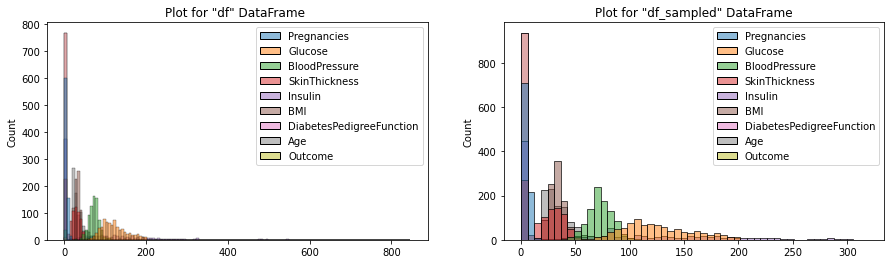

In [54]:
# Plotting two graphs with "df" before Data Preprocessing and "df_sampled" after data Preprocessing

fig, axis = plt.subplots(ncols=2)

fig.set_figwidth(15)
fig.set_figheight(4)

sb.histplot(df,ax=axis[0]).set(title="Plot for \"df\" DataFrame ")
sb.histplot(df_sampled,ax=axis[1]).set(title="Plot for \"df_sampled\" DataFrame")

* From above visualization we can see that the data before Preprocessing is spread wide with the outliers present.
* After Data Preprocessing, as outliers are handled the data is modified to be around median with adjusted mean.

**Scaling**
* Min-Max scaler

In [55]:
# Seperating into Input and Output columns 
df_sep = df_sampled.values
X, y = df_sep[:,:-1], df_sep[:,-1]

# As data is not Normally Distributed, going for Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**Model Building:**
>Importing all required libraries

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=30)

In [58]:
# Logistic Regression
LR = LogisticRegression(random_state=12345)
LR_result = LR.fit(X_train,y_train)

In [59]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
# prediction for test data
y_pred = LR.predict(X_test)
print("Test set prediction accuracy score: ",accuracy_score(y_test,y_pred))

Test set prediction accuracy score:  0.776595744680851


In [61]:
# prediction for train data 
y_train_pred = LR.predict(X_train)
print("Train set prediction accuracy score: ",accuracy_score(y_train,y_train_pred))

Train set prediction accuracy score:  0.7637195121951219


In [62]:
# Models

models = []
models.append(("LR",LogisticRegression(random_state=30)))
models.append(("DT",DecisionTreeClassifier(random_state=30)))
models.append(("RF",RandomForestClassifier(random_state=30)))
models.append(("XGB",XGBClassifier(random_state=30,eval_metric='logloss')))
models.append(("SVM",SVC(random_state=30)))
models.append(("KNN",KNeighborsClassifier()))


In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
# Using K-fold cross validation accross various classification models

from sklearn.model_selection import cross_val_score, KFold
names=[]
results=[]
prnts=[]
prnts2=[]
for name,model in models:
    kfold = KFold(n_splits=10)
    cross_Val = cross_val_score(model,X_scaled,y,cv=10, scoring="accuracy")
    prnt = "{0}: {1} ".format(name,cross_Val.mean())
    prnts.append(prnt)
    
    results.append(cross_Val.mean())
    names.append(name)
    
    # ROC-AUC score
    if name == "SVM":
        continue
    else:
        model.fit(X_train,y_train)
        y_pred_AUC = model.predict_proba(X_test)
        RocAucScore = metrics.roc_auc_score(y_test,y_pred_AUC[:,1])
        prnt2 = "{0}: {1} ".format(name,RocAucScore)
        prnts2.append(prnt2)
print(prnts)
print("\nROC-AUC scores: \n",prnts2)

['LR: 0.7473118279569892 ', 'DT: 0.7730725234500114 ', 'RF: 0.8508464882177991 ', 'XGB: 0.8327156257149394 ', 'SVM: 0.8059482955845345 ', 'KNN: 0.802745367192862 ']

ROC-AUC scores: 
 ['LR: 0.8612304736868712 ', 'DT: 0.7739244729791214 ', 'RF: 0.9147414185329356 ', 'XGB: 0.8920175926394015 ', 'KNN: 0.8399474242960416 ']


Plotting accuracy of models

<BarContainer object of 6 artists>

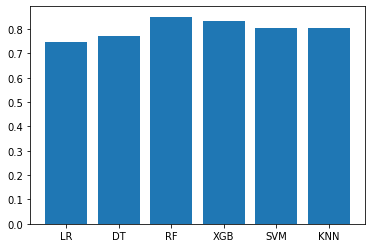

In [65]:
plt.bar(names,results)

* **From above plot we can see that Random Forest Classifier is the best performer with 85.0% accuracy**

* We can go-ahead and improve the overall Accuracy by Hyper-Parameter tuning.
* Using more Feature Engineering Techniques like Feature creation using existing features.
* Using Feature Selection to select important features which contribute the most for an Algorithm to perform well.
* Multiple algorithms can also be used Apart from what is implemented in this Notebook like Ensemble Methods and others.